In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [68]:
cwd = './results/shunqing/5s_norm_res_roll/'
files = [file for file in os.listdir(cwd) if file.endswith('.npy')]
events = list(set(['_'.join(file.split('_')[:2]) for file in files]))

In [69]:
event = events[0]
r = np.load(os.path.join(cwd,event+'_runoff.npy'))
true = np.load(os.path.join(cwd,event+'_true.npy'))
pred = np.load(os.path.join(cwd,event+'_pred.npy'))
err = true - pred


In [70]:
true.shape

(685, 1, 105, 4)

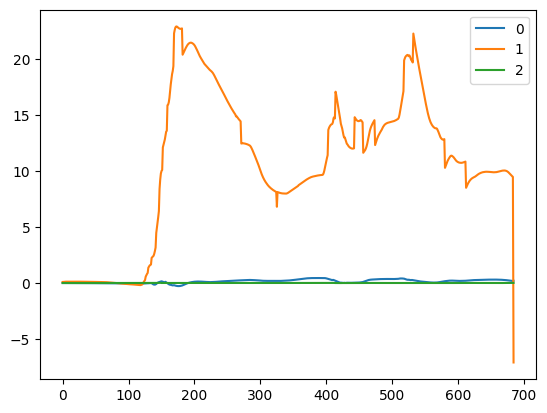

In [71]:
# true = np.load(os.path.join(cwd,event+'_true.npy'))
for i in range(3):
    plt.plot(err.mean(axis=1).mean(axis=1)[:,i],label=i)
    plt.legend()

Text(0.5, 1.0, 'Total Inflow')

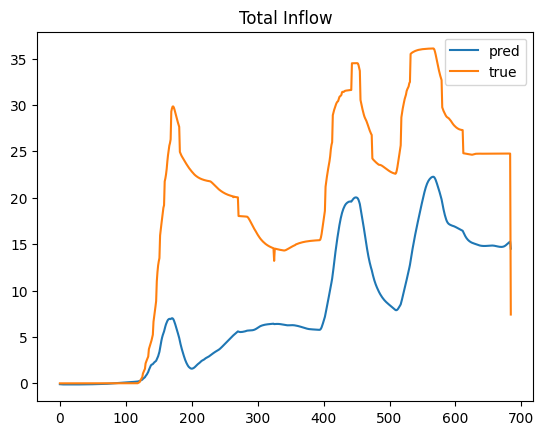

In [72]:
plt.plot(pred.mean(axis=1).mean(axis=1)[:,1],label='pred')
plt.plot(true[:,0,...].mean(axis=1)[:,1],label='true')
plt.legend()
plt.title('Total Inflow')

Text(0.5, 1.0, 'Water Depth')

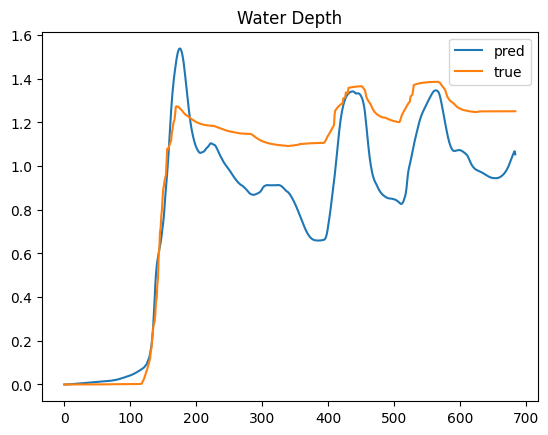

In [73]:
plt.plot(pred.mean(axis=1).mean(axis=1)[:,0],label='pred')
plt.plot(true[:,0,...].mean(axis=1)[:,0],label='true')
plt.legend()
plt.title('Water Depth')

Text(0.5, 1.0, 'Total Outflow')

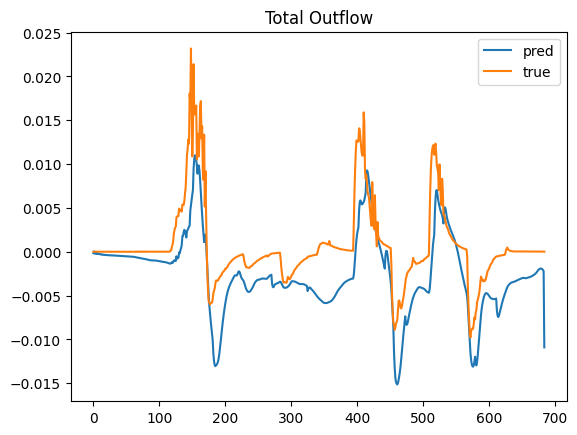

In [74]:
plt.plot(pred.mean(axis=1).mean(axis=1)[:,2],label='pred')
plt.plot(true[:,0,...].mean(axis=1)[:,2],label='true')
plt.legend()
plt.title('Total Outflow')

Text(0.5, 1.0, 'Flooding')

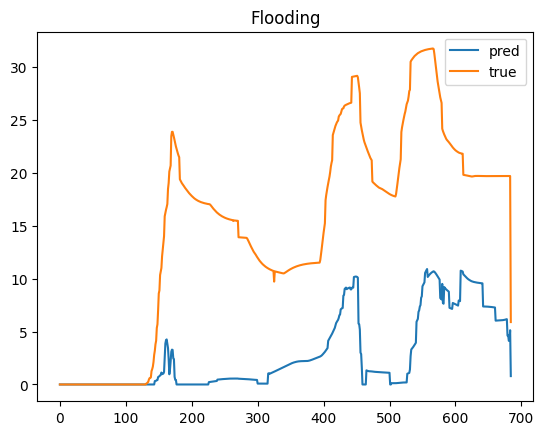

In [75]:
plt.plot(pred.mean(axis=1).mean(axis=1)[:,-1],label='pred')
plt.plot(true.mean(axis=1).mean(axis=1)[:,-1],label='true')
plt.legend()
plt.title('Flooding')

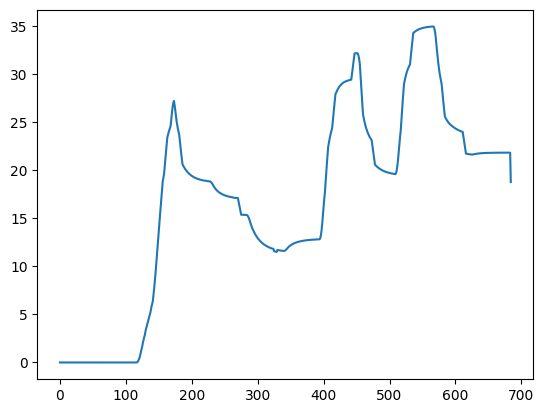

In [76]:
plt.plot(r.mean(axis=1).mean(axis=1))

In [78]:
from swmm_api import read_out_file
from pyswmm import Node

In [97]:
event

'bpswmm_117'

In [86]:
out = read_out_file('./envs/network/shunqing/{}.out'.format(event))
depth = out.get_part('node',variable='depth')
inflow = out.get_part('node',variable='total_inflow') - out.get_part('node',variable='lateral_inflow')
# outflow = out.get_part('node',variable='depth')
flooding = out.get_part('node',variable='flooding')

<AxesSubplot:>

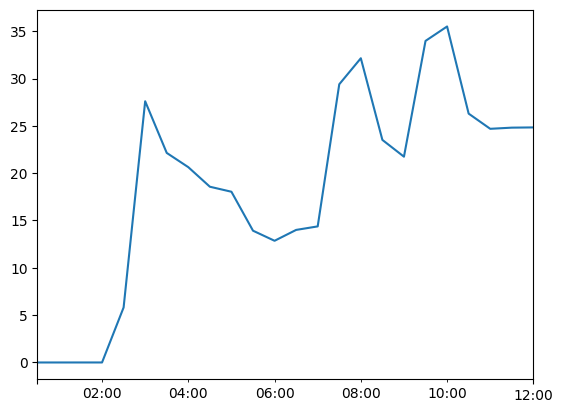

In [100]:
(inflow.mean(axis=1)*60).plot()

In [101]:
from pyswmm import Simulation,Nodes
sim = Simulation('./envs/network/shunqing/bpswmm_117.inp')
nodes = Nodes(sim)
node = nodes['jd1']
in1,in2 = [], []
for _ in sim:
    sim.step_advance(60)
    in1.append(node.cumulative_inflow)
    in2.append(node.total_inflow)
in1 = np.diff([0]+in1)
in2 = np.array(in2)*60

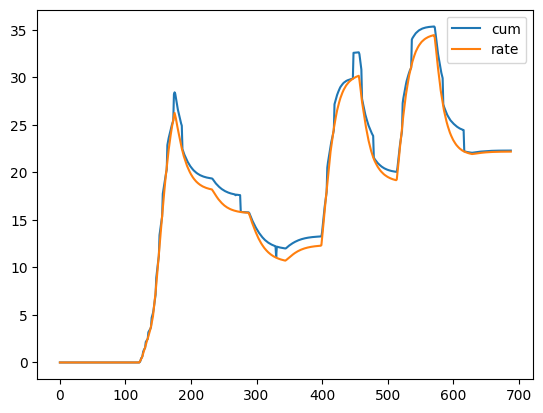

In [103]:
plt.plot(in1,label = 'cum')
plt.plot(in2,label='rate')
plt.legend()